## Hopfield network to memorize 2D binary patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate binary 2D patterns

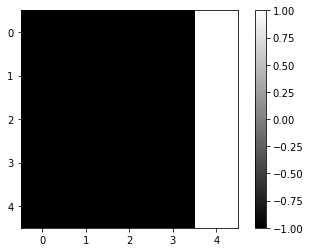

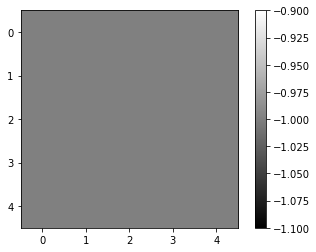

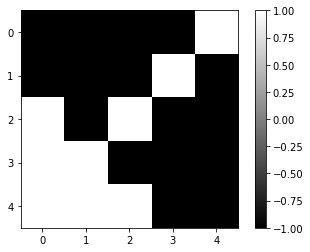

In [2]:
Width  = 5
Height = 5

NumberMemory = 3

Data = np.zeros((Width, Height, NumberMemory))

Data[:,:,0] = [[0,0,0,0,1],
               [0,0,0,0,1],
               [0,0,0,0,1],
               [0,0,0,0,1],
               [0,0,0,0,1]]

Data[:,:,1] = [[0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0],
               [0,0,0,0,0]]

Data[:,:,2] = [[0,0,0,0,1],
               [0,0,0,1,0],
               [1,0,1,0,0],
               [1,1,0,0,0],
               [1,1,1,0,0]]

Data = 2 * Data - 1

for i in range(NumberMemory):
    plt.imshow(Data[:,:,i], cmap='gray')
    plt.colorbar()
    plt.show()

### Flatten 2D patterns

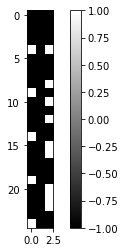

In [3]:
FlattenData = np.zeros((Width*Height, NumberMemory))

for i in range(NumberMemory):
    FlattenData[:,i] = Data[:,:,i].flatten()

plt.imshow(FlattenData, cmap='gray')
plt.colorbar()
plt.show()

### Calculate the weights using Hebb's rule

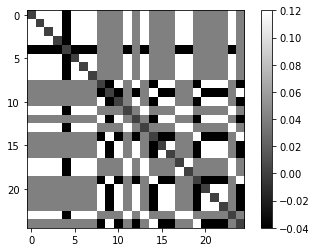

In [4]:
Weight = np.matmul(FlattenData, FlattenData.T) / (Width*Height)

for i in range(Width*Height):
    Weight[i,i] = 0

plt.imshow(Weight, cmap='gray')
plt.colorbar()
plt.show()

### Generate a random input pattern

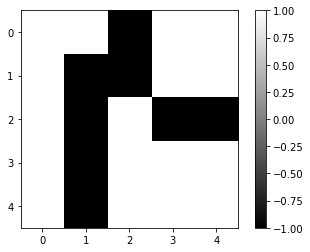

In [5]:
Input = np.random.rand(Width*Height,1) > 0.5
Input = 2 * Input - 1

plt.imshow(Input.reshape(Width,Height), cmap='gray')
plt.colorbar()
plt.show()

### Recall the memorized pattern

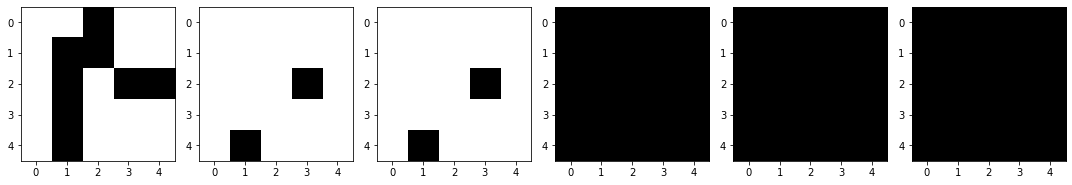

In [6]:
MaxEpoch = 5

fig, axs = plt.subplots(1, MaxEpoch+1, figsize=(15, 5))
axs[0].imshow(Input.reshape(Width,Height), cmap='gray')

for Epoch in range(MaxEpoch):
    for i in range(Width*Height):

        j = np.random.randint(Width*Height)
        Input[j] = np.sign(np.matmul(Weight[j,:], Input))

    axs[Epoch+1].imshow(Input.reshape(Width,Height), cmap='gray')

plt.tight_layout()
plt.show()